<a href="https://colab.research.google.com/github/wfwan/github-slideshow/blob/master/Section2_Unit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Tickers Data

In the previous notebook, you learnt how to download the data for a single asset. But in most cases, you will need to retrieve the data for multiple assets at the same time. In this notebook, you will learn the same.

You will perform the following steps. You will download the:
1. Data for multiple assets
2. Data for assets constituting KLCI

# Import Libraries

In [2]:
# For data manipulation
import pandas as pd

# To fetch financial data
!pip install yfinance
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

     |████████████████████████████████| 6.3MB 6.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.60-py2.py3-none-any.whl size=23819 sha256=d3f70dca0356bb8079c44f97dd379d1fe5af440295021c60584a126d0f0da2a5
  Stored in directory: /root/.cache/pip/wheels/f0/be/a4/846f02c5985562250917b0ab7b33fff737c8e6e8cd5209aa3b
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# Data for Multiple Assets

Downloading data for multiple assets is as simple as downloading the data for a single asset. This can be done by simply extending the list of tickers in the `download()` method.

Syntax:

import yfinance as yf

yf.download(ticker_list, start, end,)[column_name]

Parameters:
1. ticker_list: List of all tickers
2. start: Start date
3. end: End date, if not specified, data is downloaded till current data
4. column_name: The column to extract from the dataframe

Returns: A `pandas` dataframe containing the open, high, low, close, and adjusted close price along with the volume for all trading days between the start and the end date.

After downloading the data, you can use the `matplotlib` package to visualize the data.

In [3]:
# Define the ticker list
ticker_list = ['7113.KL', '9318.KL', '0113.KL']

# Download the data for the above tickers and extract the Adj Close column
price_data = yf.download(ticker_list, start="2021-06-27", end="2021-07-03")['Adj Close']

# Set the index to a datetime object
price_data.index = pd.to_datetime(price_data.index)

# Display the first 5 rows
price_data.head()

[*********************100%***********************]  3 of 3 completed


,0113.KL,7113.KL,9318.KL
Date,,,
2021-06-28,0.885,4.23,0.300
2021-06-29,0.885,4.30,0.300
2021-06-30,0.865,4.17,0.295
2021-07-01,0.885,4.07,0.300
2021-07-02,0.915,4.01,0.305


# Plot the Series

Since you will be visualizing the price of three different assets, you can divide the entire price series by its respective first price value. This will make the changes comparable.

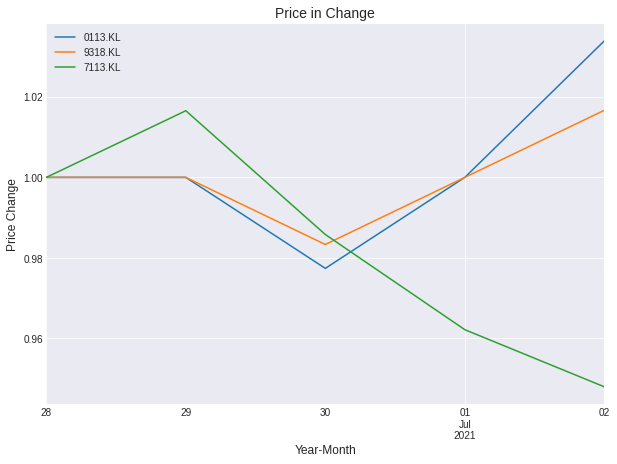

In [6]:
# Plot the absolute price series
plt.figure(figsize=(10,7))
(price_data['0113.KL']/price_data['0113.KL'].iloc[0]).plot()
(price_data['9318.KL']/price_data['9318.KL'].iloc[0]).plot()
(price_data['7113.KL']/price_data['7113.KL'].iloc[0]).plot()

# Set the title and axes label
plt.title('Price in Change', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Price Change', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Data for Assets Constituting KLCI

To download the data for all the assets that make up the KLCI, you will first need the ticker of all the asset. You can read this information from a web source by using the read_html method of pandas.

Syntax:

pandas.read_html(url)

Parameters:

url: url of the website (in string format)

Returns: The above method will return a list of dataframes. You can use a proper index to extract the desired data.

You will now read the information from topforeignstocks.com

In [12]:
# url of the source
url = 'https://topforeignstocks.com/indices/the-components-of-the-ftse-bursa-malaysia-klci-index/'

# Read and print the stock tickers that make up KLCI
tickers = pd.read_html(url)[0]

tickers.head()

,S.No.,Company Name,Ticker,Industry
0,1,Axiata Group Berhad,6888.KL,Telecommunications Service Providers
1,2,CIMB Group Holdings Berhad,1023.KL,Banking
2,3,Dialog Group Berhad,7277.KL,"Energy Infrastructure, Equipment & Services"
3,4,DiGi.Com Berhad,6947.KL,Telecommunications Service Providers
4,5,Genting Berhad,3182.KL,"Travel, Leisure & Hospitality"


In the above dataframe, you can see that the tickers of the assets are stored in the column `Ticker`. You will extract this column, convert it into a list, and pass it as tickers' list into `yf.download()`.

Syntax to convert a column of a dataframe to a list:

DataFrame[column].tolist()

Parameter: column: The column to be converted into a list

The following cell fetches the price data for KLCI assets. It might take time to run.

In [16]:
# Convert (the ticker) 'Ticker' column to list
ticker_symbol = tickers['Ticker'].tolist()

# Clean the symbols
#ticker_symbol = [ticker.replace(".",".") for ticker in ticker_symbol]

# Get the data for this tickers from yfinance
data = yf.download(ticker_symbol, '2021-06-27', auto_adjust=True)['Close']
data.head()

[*********************100%***********************]  30 of 30 completed


,1023.KL,1066.KL,1082.KL,1155.KL,1295.KL,1961.KL,2445.KL,3034.KL,3182.KL,3816.KL,4065.KL,4197.KL,4707.KL,4715.KL,4863.KL,5168.KL,5183.KL,5225.KL,5285.KL,5347.KL,5681.KL,5819.KL,6012.KL,6033.KL,6888.KL,6947.KL,7106.KL,7113.KL,7277.KL,8869.KL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-28,4.61,5.42,17.820000,8.14,4.15,3.75,20.340000,7.76,5.00,6.80,18.420000,2.13,133.000000,2.86,6.05,7.30,8.12,5.62,4.08,9.85,19.100000,18.799999,4.42,15.70,3.80,4.28,3.33,4.23,2.88,4.79
2021-06-29,4.61,5.37,17.799999,8.13,4.15,3.81,20.400000,7.90,4.96,6.83,18.400000,2.20,133.300003,2.79,6.10,7.49,8.06,5.63,4.11,9.84,18.980000,18.840000,4.43,15.70,3.79,4.28,3.48,4.30,2.91,4.84
2021-06-30,4.61,5.40,17.799999,8.11,4.11,3.76,20.360001,7.80,4.93,6.78,18.299999,2.18,133.300003,2.77,6.07,7.35,8.06,5.47,3.98,9.79,18.600000,18.719999,4.39,15.50,3.74,4.13,3.30,4.17,2.89,4.78
2021-07-01,4.64,5.41,17.820000,8.11,4.12,3.79,20.299999,7.74,4.98,6.78,18.200001,2.18,133.300003,2.81,6.14,7.14,8.05,5.56,4.06,9.75,18.540001,18.799999,4.40,15.62,3.78,4.17,3.31,4.07,2.87,4.75
2021-07-02,4.64,5.39,18.000000,8.11,4.11,3.82,20.320000,7.80,4.95,6.76,18.240000,2.17,133.500000,2.80,6.11,7.02,8.07,5.61,3.98,9.73,18.600000,18.820000,4.41,15.62,3.82,4.20,3.23,4.01,2.88,4.78


The above dataframe has the close price of all the assets that make up the KLCI.

# Tweak the code

You can tweak the code in the following ways:
1. Use a list of asset of your choice to download the data.
2. Use a different time period to download the data.

In the next notebook, you will learn how to download minute leavel data and resample them.